In [98]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
gold = pd.read_csv("Analyzed_Bcoin.csv")

In [100]:
gold

,index,date,value,ma5,ma10,ma20,ma30,ma60,Profit,Profit rate,180 day profit,Standard Dev of 180-day-profit,Standard Dev,Coefficient of Variation,Bias(5:30),sharp ratio,credit_of_future_tendency,Risk_credit,Credit_to_SELL
0,0,2016/9/11,621.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00%,0.00%,0.000000,0.000000,NaN,0,0.00,0.00,0.00
1,1,2016/9/12,609.67,NaN,NaN,NaN,NaN,NaN,-11.98,-0.0193,-1.93%,0.96%,5.990000,0.009729,NaN,-200.00%,0.00,-3.00,1.65
2,2,2016/9/13,610.92,NaN,NaN,NaN,NaN,NaN,1.25,0.0021,-1.73%,0.86%,5.377069,0.008756,NaN,-199.55%,0.00,-3.00,3.14
3,3,2016/9/14,608.82,NaN,NaN,NaN,NaN,NaN,-2.10,-0.0034,-2.06%,0.83%,5.183852,0.008460,NaN,-247.50%,0.00,-3.47,3.23
4,4,2016/9/15,610.38,612.288,NaN,NaN,NaN,NaN,1.56,0.0026,-1.81%,0.76%,4.733706,0.007731,NaN,-238.08%,0.00,-3.38,3.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,1821,2021/9/6,51769.06,49988.708,49093.547,48394.7485,47543.38133,41591.80900,1821.68,0.0365,-5.67%,175.17%,9784.912873,0.214269,0.051434,-3.24%,0.01,-1.03,5.75
1822,1822,2021/9/7,52677.40,50751.636,49455.601,48796.1900,47811.49033,41921.80883,908.34,0.0175,-5.93%,174.43%,9774.803481,0.214104,0.061495,-3.40%,NaN,-1.03,5.34
1823,1823,2021/9/8,46809.17,50247.668,49246.753,48897.7555,47911.25800,42138.31967,-5868.23,-0.1114,-18.96%,173.63%,9744.770722,0.213684,0.048765,-10.92%,NaN,-1.11,-4.25
1824,1824,2021/9/9,46078.38,49456.278,48973.913,48864.9420,47902.75533,42347.69983,-730.79,-0.0156,-19.52%,172.67%,9702.610363,0.213061,0.032431,-11.30%,NaN,-1.11,1.64


In [88]:
bias = gold["Bias(5:30)"].fillna(0)
rc = gold.Risk_credit.fillna(0)
pr = gold["Profit rate"].fillna(0)
fc = gold["credit_of_future_tendency"].fillna(0)
bias = bias/max(bias)
rc = rc/max(rc)
pr = pr/max(pr)
fc = fc/max(fc)

C:\Users\Micha\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


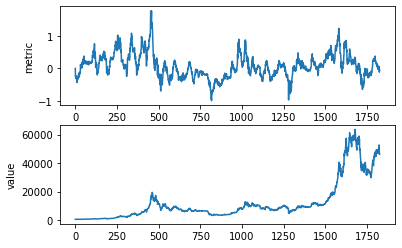

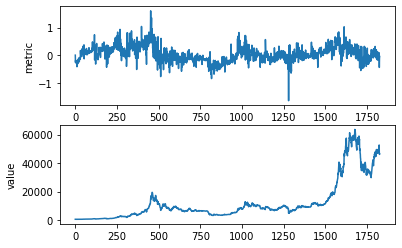

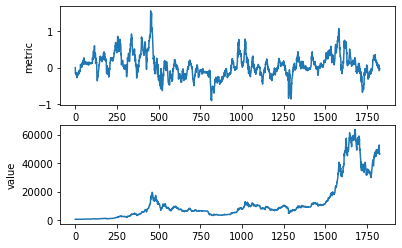

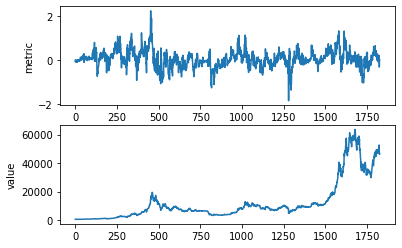

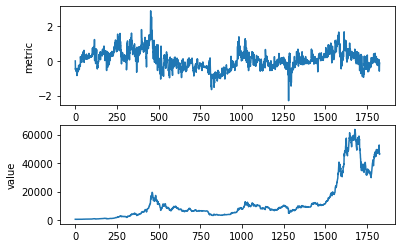

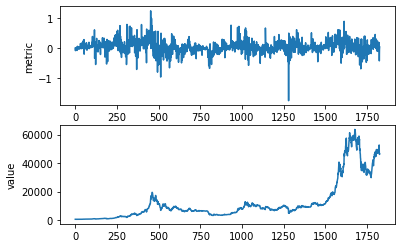

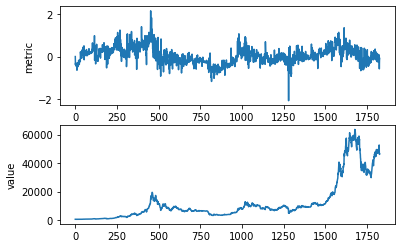

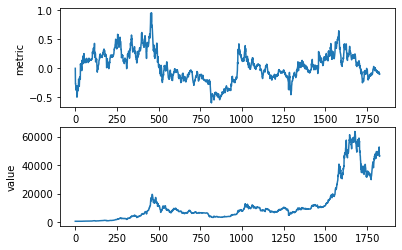

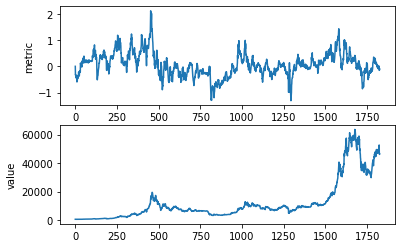

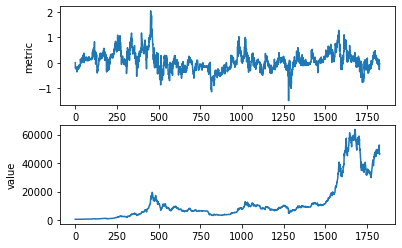

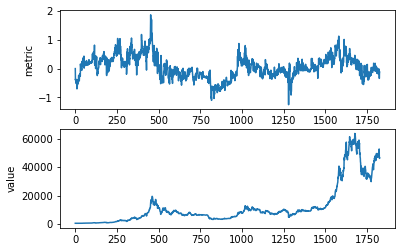

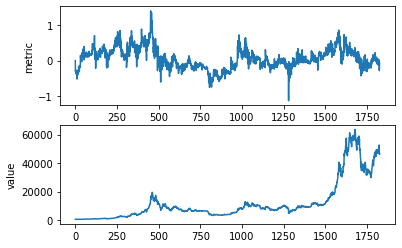

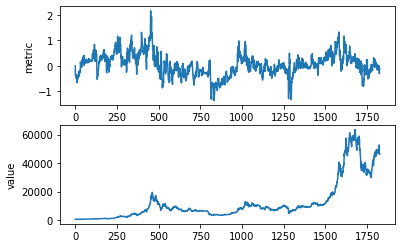

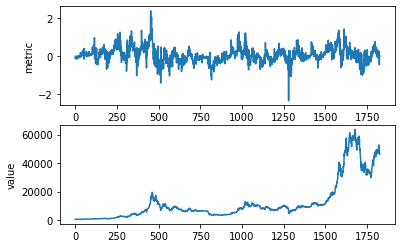

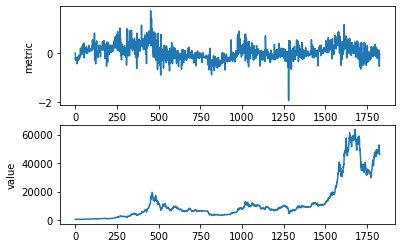

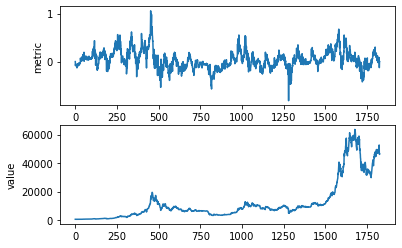

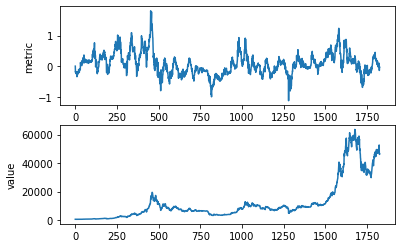

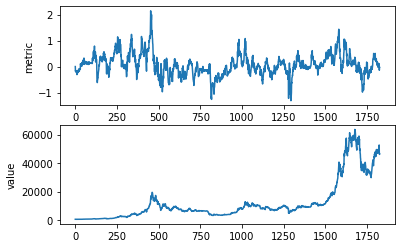

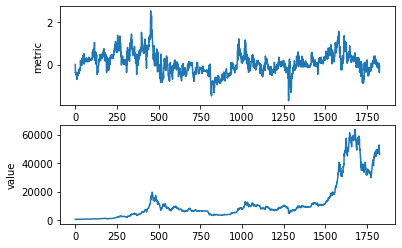

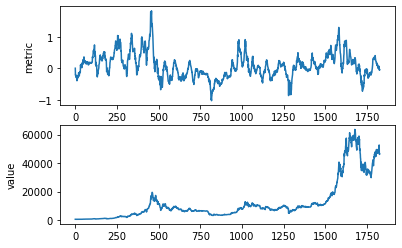

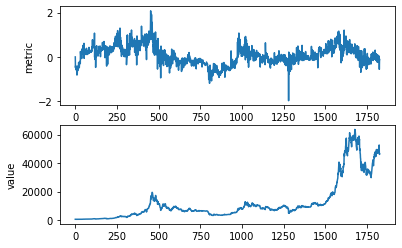

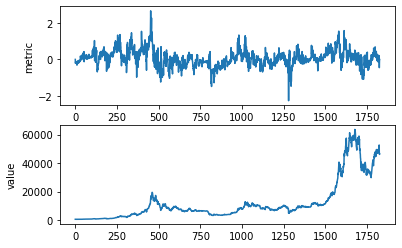

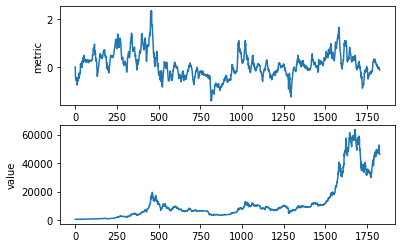

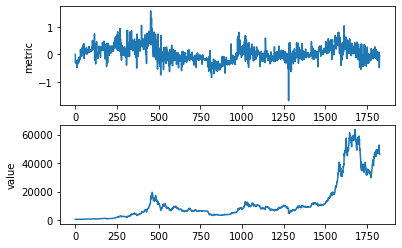

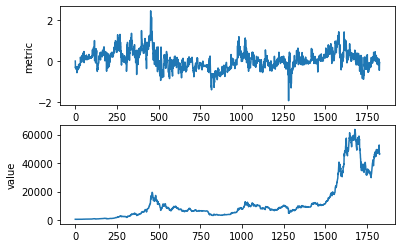

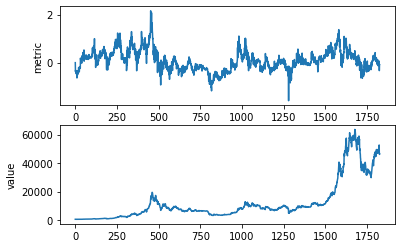

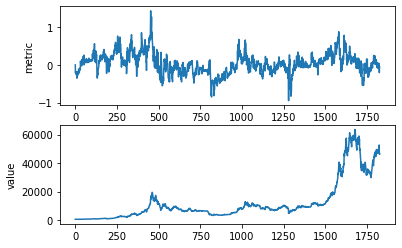

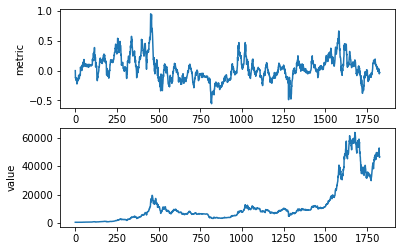

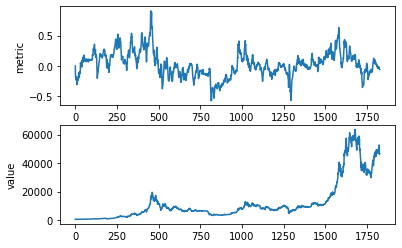

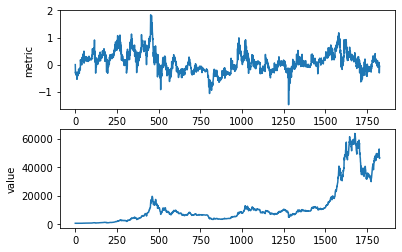

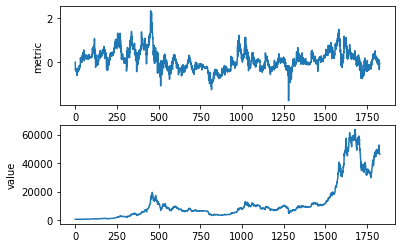

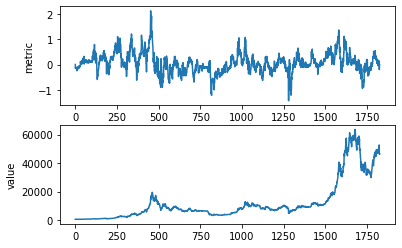

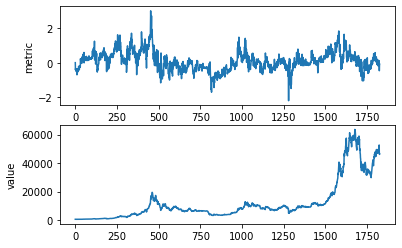

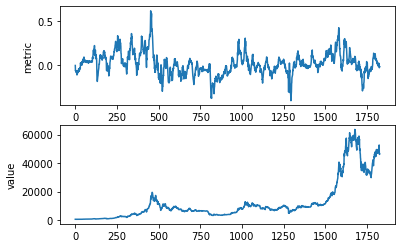

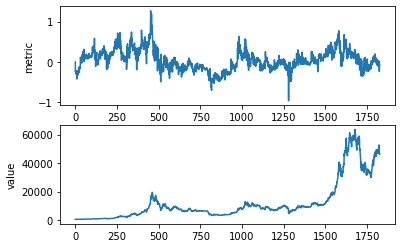

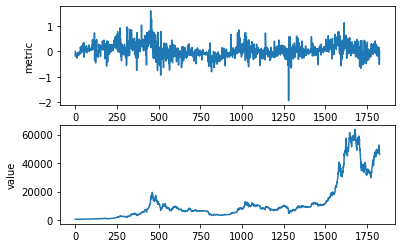

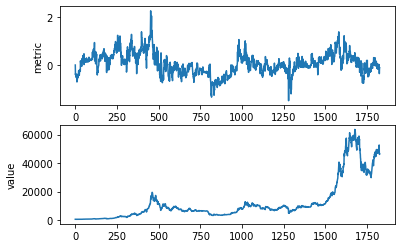

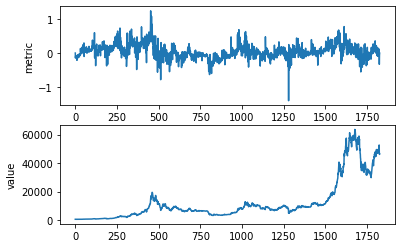

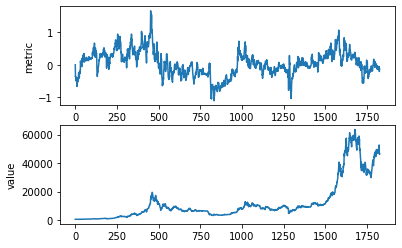

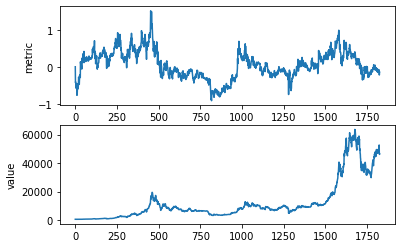

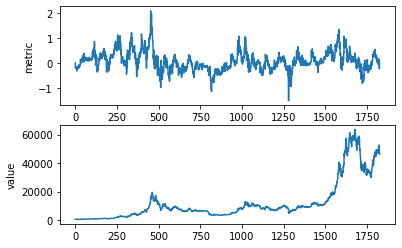

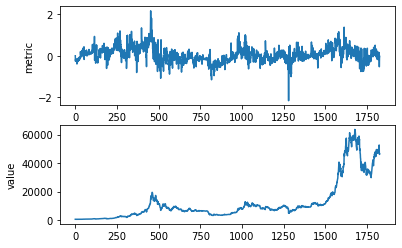

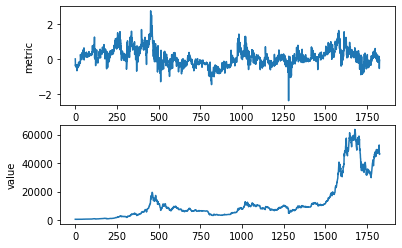

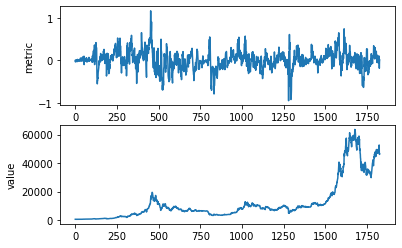

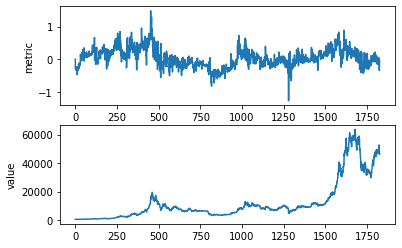

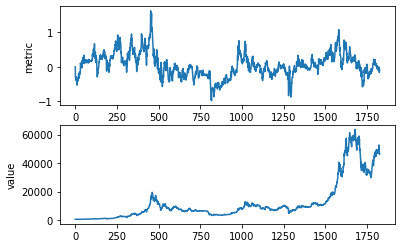

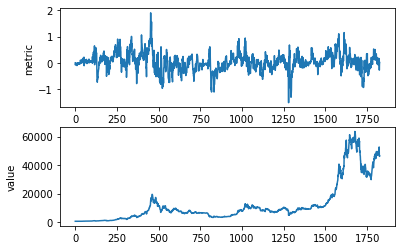

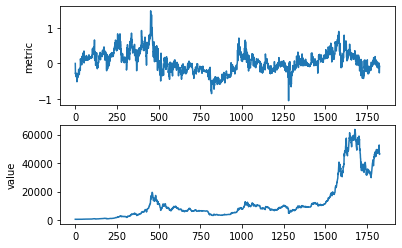

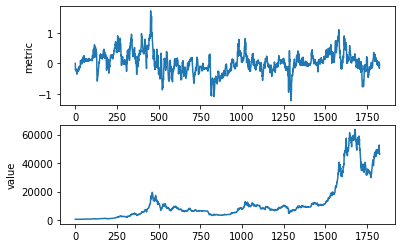

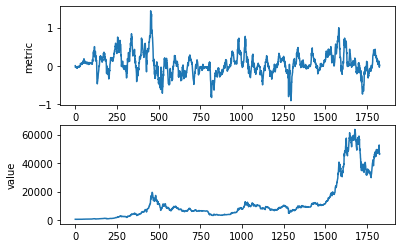

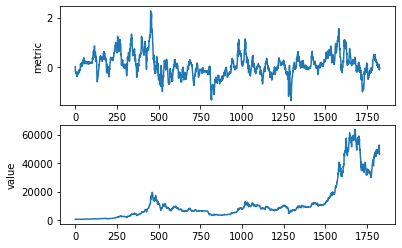

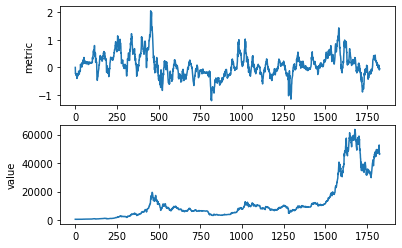

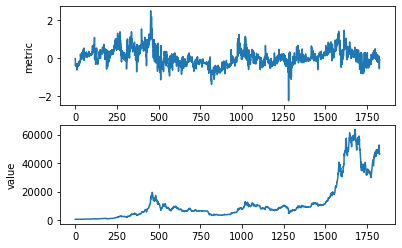

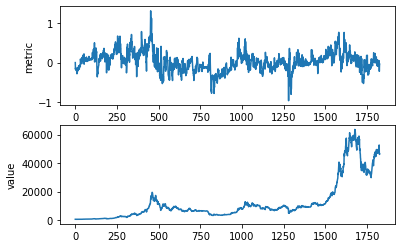

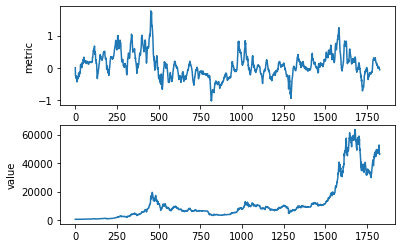

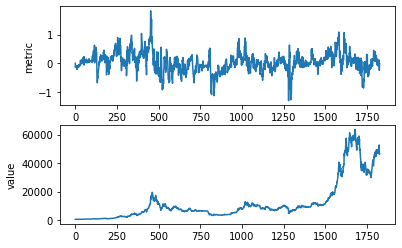

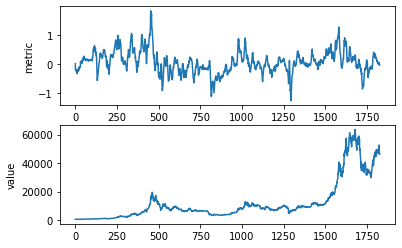

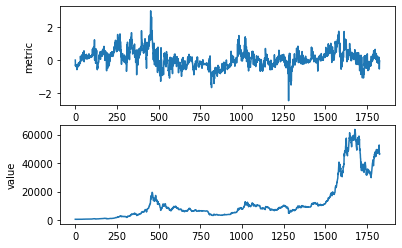

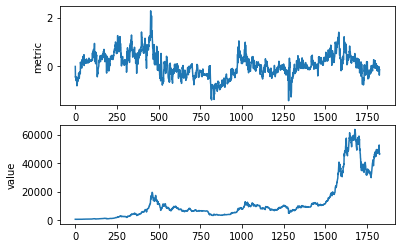

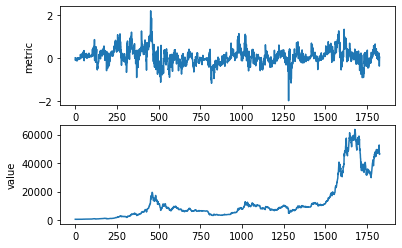

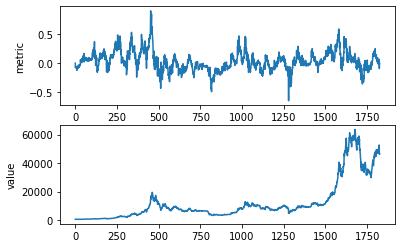

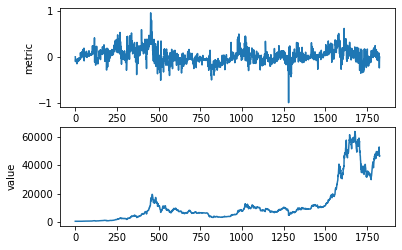

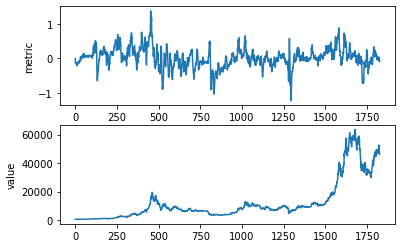

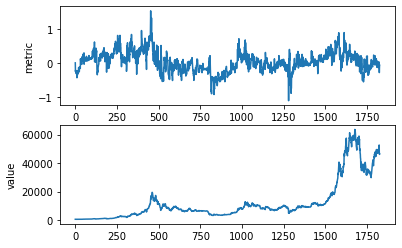

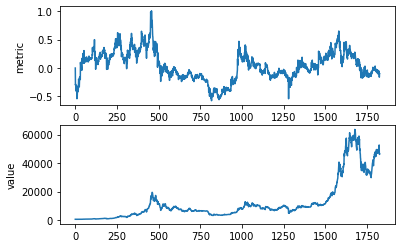

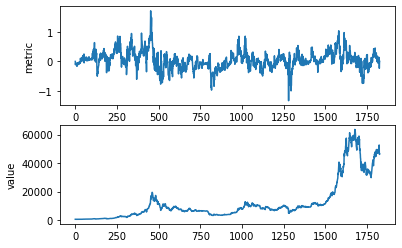

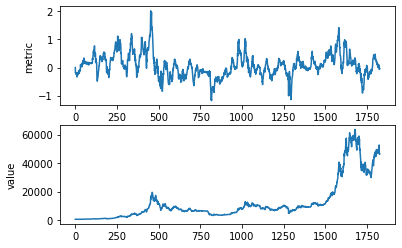

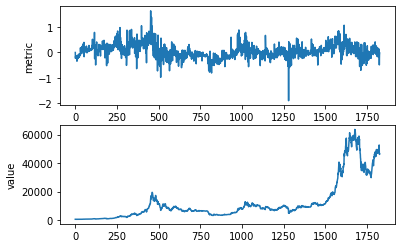

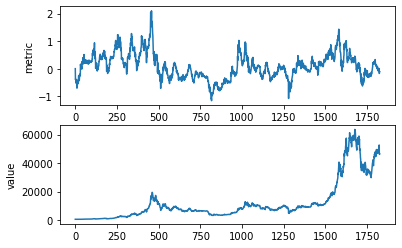

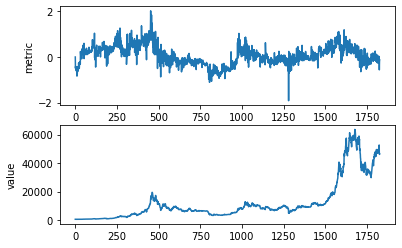

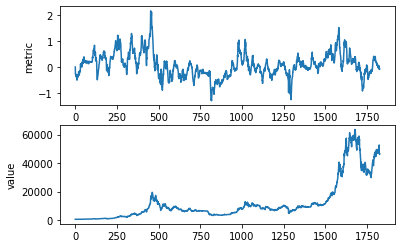

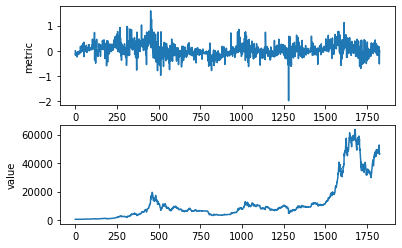

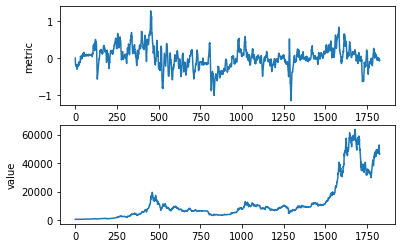

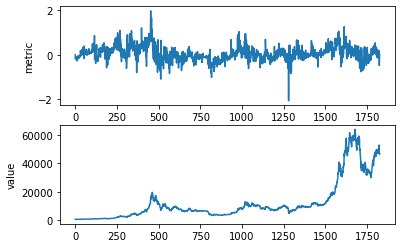

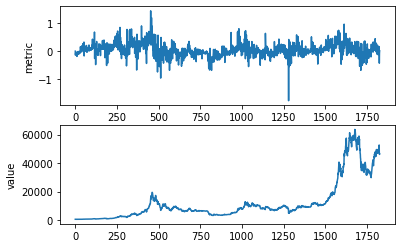

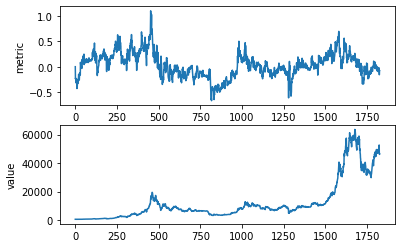

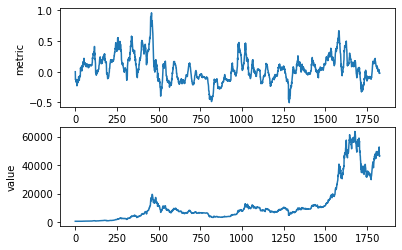

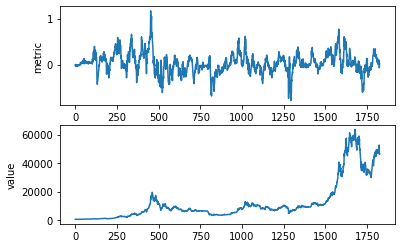

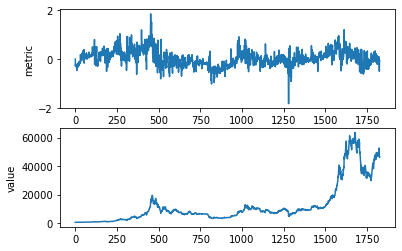

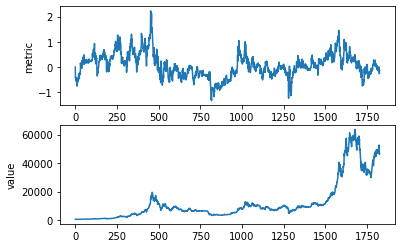

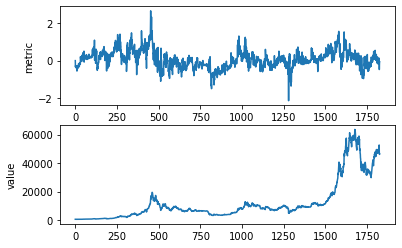

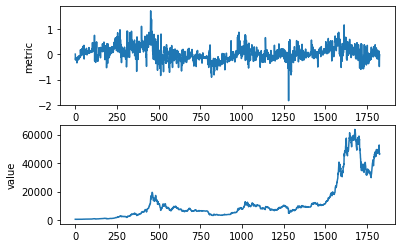

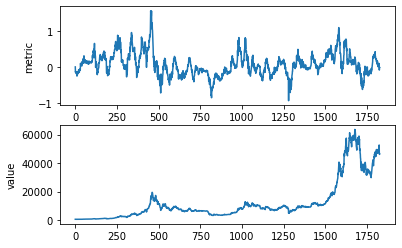

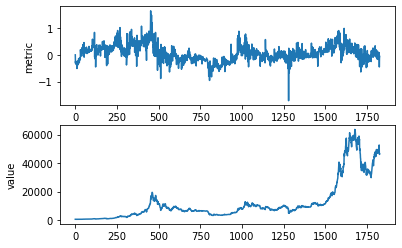

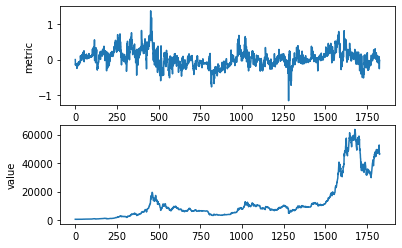

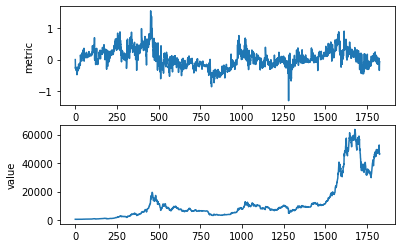

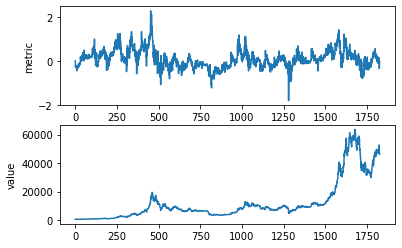

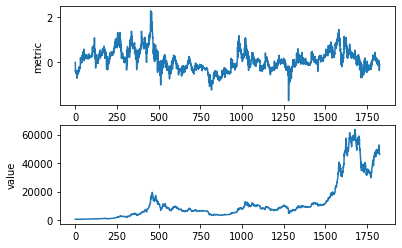

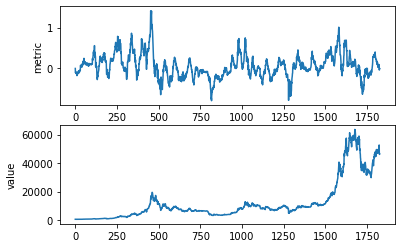

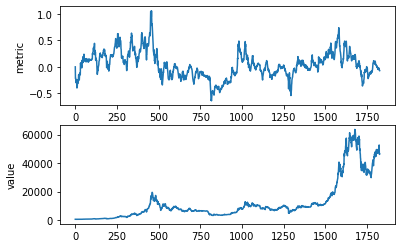

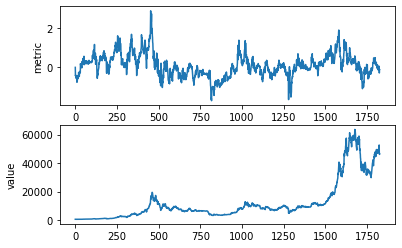

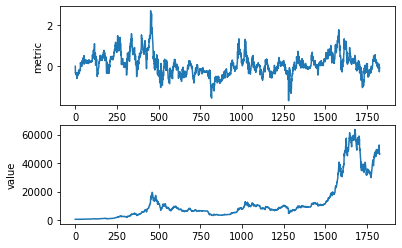

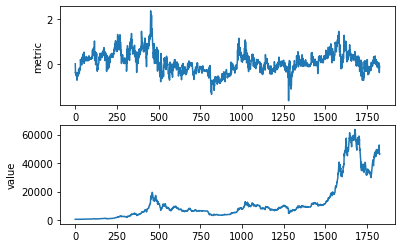

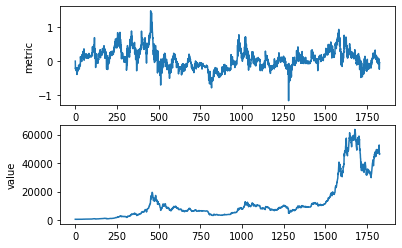

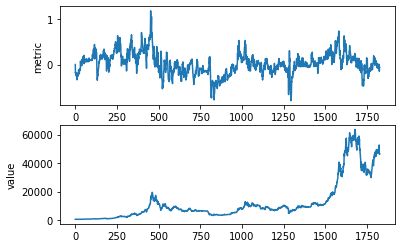

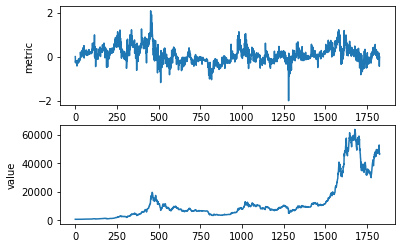

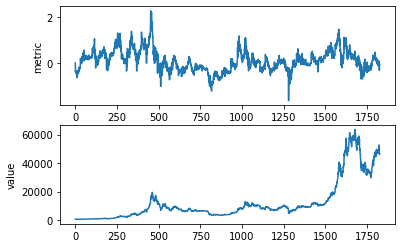

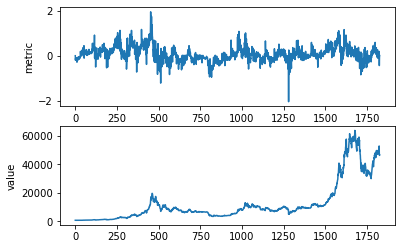

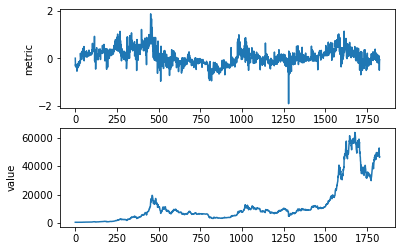

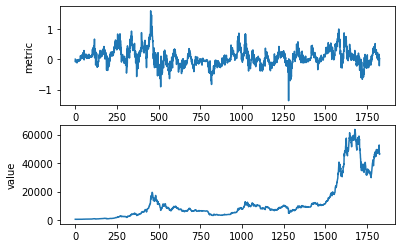

In [89]:
wtf = []
for i in range(100):
    bw = random.random()
    rw = random.random()
    pw = random.random()
    fw = random.random()
    data = pd.DataFrame({"metric":bw*bias+rw*rc+pw*pr+fw*fc})
    wtf.append([bw,rw,pw,fw])
    fig, axes = plt.subplots(2, 1)
    #create chart in each subplot
    sns.lineplot(data=data.metric, ax=axes[0])
    sns.lineplot(data=gold.value, ax=axes[1]).get_figure().savefig(f"./iamges/{round(bw,3)}_{round(rw,3)}_{round(pw,3)}_{round(fw,3)}.png") 

In [90]:
bias.fillna(0)

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1821    0.091479
1822    0.109373
1823    0.086733
1824    0.057681
1825    0.030149
Name: Bias(5:30), Length: 1826, dtype: float64

In [108]:
credit = 0.931*bias+0.414*rc+0.309*pr+0.399*fc

In [109]:
gold.Credit_to_SELL = credit

In [110]:
credit

0       0.000000
1      -0.201707
2      -0.171471
3      -0.206571
4      -0.192860
          ...   
1821    0.096797
1822    0.066661
1823   -0.141190
1824   -0.032883
1825   -0.029317
Length: 1826, dtype: float64

In [111]:
gold.to_csv("Analyzed_Bcoin.csv")